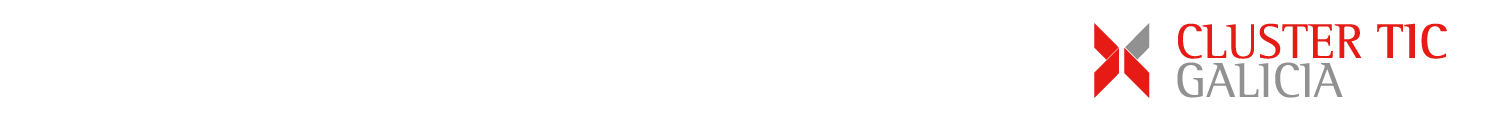
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:80px;padding:10px;margin:10px 0 0 0;">Expresiones regulares</div>

La librería **re** de Python se utiliza para trabajar con expresiones regulares (*regex*, *regular expressions*), que son secuencias de caracteres que forman un patrón de búsqueda. Las expresiones regulares suponen una versátil herramienta para el procesamiento de texto, permitiendo realizar tareas como:

* Buscar patrones dentro de una cadena
* Dividir una cadena en subcadenas
* Reemplazar partes de una cadena
* Validar si una cadena cumple con un patrón específico

# Importación de la librería

Comencemos importando esta librería, que se importa sin alias:

In [1]:
import re

Y veamos a continuación algunas funciones útiles.

# Búsqueda de patrones simples

La función **re.search()** busca un patrón dentro de una cadena y devuelve un objeto de tipo **Match** si encuentra una coincidencia. Si no hay coincidencias, devuelve *None*. Por ejemplo, supongamos que partimos del siguiente texto:

In [2]:
texto = "Python for Data Science"

y queremos saber si se encuentra en él el texto "Data":

In [3]:
patron = "Data"

Realicemos la búsqueda:

In [4]:
resultado = re.search(patron, texto)

Comprobemos el tipo del resultado obtenido:

In [5]:
type(resultado)

re.Match

Lo que indica que se encontró el patrón buscado en el texto. Otra forma de averiguarlo sería con un *if*:

In [6]:
if resultado:
    print("Se encontró el patrón")
else:
    print("No se encontró el patrón")

Se encontró el patrón


### El objeto Match

Este objeto **Match** ofrece varios métodos y atributos que podemos utilizar para obtener más detalles sobre la parte del texto que coincidió con el patrón de búsqueda. Algunos de los más útiles son:

#### start()

Este método devuelve el índice (posición) en el texto en el que estamos haciendo la búsqueda en el cual se ha encontrado el patrón de búsqueda:

In [7]:
resultado.start()

11

Efectivamente, el texto que estamos buscando ("Data") comienza en la posición 11 del texto en el que hacemos la búsqueda:

In [8]:
texto[11]   # Primera letra del bloque de texto que satisface el patrón de búsqueda

'D'

#### end()

De forma análoga, el método **end()** devuelve el índice o posición final:

In [9]:
resultado.end()

15

In [10]:
texto[15]

' '

Obsérvese que esta posición es la del carácter que sigue al texto que se ha encontrado.

#### span()

El método **span()** devuelve una tupla que contiene los índices inicial y final de la subcadena que coincide con el patrón. Esencialmente combina start() y end() en una sola llamada.

In [11]:
resultado.span()

(11, 15)

#### string

El atributo **string** devuelve la cadena de texto original que se pasó a *re.search()* (es decir, el texto en el que estamos realizando la búsqueda):

In [12]:
resultado.string

'Python for Data Science'

#### re

El atributo **re** devuelve el patrón de búsqueda utilizado:

In [13]:
resultado.re

re.compile(r'Data', re.UNICODE)

#### group()

El método **.group()** devuelve el texto que satisface nuestro patrón de búsqueda (veremos más adelante este método con algo más de detalle):

In [14]:
resultado.group()

'Data'

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Raw strings

Observa en el resultado anterior que el patrón de búsqueda se muestra precedido con una "r":

In [15]:
r'Data'

'Data'

El prefijo r al comienzo de una cadena de texto en Python indica que la cadena es una *cadena cruda* (**raw string**). En el contexto de las expresiones regulares, usar cadenas crudas es una práctica común y recomendada porque simplifica la escritura de los patrones de búsqueda.

Las cadenas crudas le dicen a Python que ignore las secuencias de escape dentro de la cadena, tratándolas como texto literal. Las secuencias de escape en Python son combinaciones especiales que comienzan con una barra invertida (\) seguidas por una letra o combinación de dígitos que representan un carácter especial. Por ejemplo, \n representa un salto de línea, y \t representa un tabuladocruda:

En las expresiones regulares -lo veremos en breve-, se utilizan con frecuencia caracteres especiales y secuencias que incluyen la barra invertida. Por ejemplo, **\b** representa un límite de palabra, y **\d** representa cualquier dígito. Sin el prefijo r, Python intentaría interpretar estas secuencias de escape antes de que la expresión regular fuese procesada, lo que podría llevar a errores o comportamientos no deseados.

Por ejemplo, considera el siguiente patrón de expresión regular sin usar una cadena cruda:

In [16]:
patron = "\\bPython\\b"

Aquí, para representar el límite de palabra \b en la expresión regular, necesitamos "escapar" cada barra invertida con otra barra invertida, lo que resulta en \\b. Esto hace que el patrón sea más difícil de leer y de escribir.

Usando una cadena cruda, el mismo patrón se simplifica a:

In [17]:
patron = r"\bPython\b"

En este caso, no necesitamos escapar las barras invertidas, haciendo que el patrón sea más claro y más cercano a cómo se expresaría en la mayoría de los lenguajes y herramientas que utilizan expresiones regulares.

En muchos casos verás que los resultados que obtenemos son los mismos tanto si marcamos el patrón de búsqueda como "crudo" como si no, pero, en general, siempre es buena práctica asegurarse de que trabajamos siempre con textos crudos para evitar problemas.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Resultados múltiples

Si el patrón buscado se encuentra en más de un lugar de la cadena de texto, el método *re.search* solo devuelve la primera coincidencia:

In [18]:
texto = "mi gato y tu gata juegan con los gatitos de los gatos del vecino"
patron = r"gat"

In [19]:
resultado = re.search(patron, texto)

In [20]:
resultado.span()

(3, 6)

Si estamos interesados en encontrar todas las ocurrencias del patrón en la cadena de texto, deberemos usar la función **re.findall()** o **re.finditer()**.

### re.findall()

La primera de estas funciones, **re.findall()** devuelve una lista conteniendo los textos encontrados:

In [21]:
re.findall(patron, texto)

['gat', 'gat', 'gat', 'gat']

### re.finditer()

La función **re.finditer()**, por otro lado, devuelve un iterador que produce objetos *Match* para todas las coincidencias del patrón. Esto es útil si necesitamos acceso a la información detallada de cada coincidencia (como las posiciones de inicio y fin de éstas):

In [22]:
for match in re.finditer(patron, texto):
    print(match.re, match.span())

re.compile('gat') (3, 6)
re.compile('gat') (13, 16)
re.compile('gat') (33, 36)
re.compile('gat') (48, 51)


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Búsqueda de patrones complejos

Sin embargo, la potencia de las expresiones regulares no reside en facilitar la búsqueda de un texto fijo dentro de otro texto, sino en permitir búsquedas complejas. Por ejemplo, sigamos trabajando con la frase anterior:

In [23]:
texto = "mi gato y tu gata juegan con los gatitos de los gatos del vecino"

Podríamos estar interesados en encontrar todas las ocurrencias de los textos "gato" y "gata". Esto podría conseguirse usando un patrón de búsqueda del tipo "gat.". En este patrón, el punto representa cualquier carácter, con lo que se identificaría una coincidencia siempre que se encontrase el texto "gat" seguido de cualquier otro carácter:

In [24]:
re.findall(r"gat.", texto)

['gato', 'gata', 'gati', 'gato']

Comprobamos que también se ha identificado como coincidencia los cuatro primeros caracteres de la palabra "gatitos" (pues cumple nuestro patrón de búsqueda). Si quisiéramos que el patrón solo considerase como cuarto carácter la "o" o la "a" (es decir, si solo quisiéramos encontrar las palabras "gato" y "gata"), podríamos conseguirlo con el siguiente patrón:

In [25]:
re.findall(r"gat[oa]", texto)

['gato', 'gata', 'gato']

Situar entre corchetes uno o más caracteres obliga a que cualquier coincidencia tenga que incluir, en dicha posición, uno de ellos.

Si quisiéramos buscar los textos "gato", "gata", "gatos" y "gatas" (es decir, si quisiéramos buscar los textos "gato" y "gata" seguidos o no por una letra "s"), podríamos conseguirlo con el siguiente patrón:

In [26]:
re.findall(r"gat[oa]s?", texto)

['gato', 'gata', 'gatos']

La interrogración indica que el patrón que la precede (en nuestro caso, la letra "s") puede aparecer cero o una veces para que sea considerada una coincidencia (es decir, que es opcional).

Esto nos permitiría encontrar todas las coincidencias con los textos "gato", "gata", "gatos", "gatas", "gatito", "gatita", "gatitos" y "gatitas". Para esto basta con observar que, en todos estos términos, las letras "gat" siempre se encuentran al comienzo, las letras "it" son opcionales, a continuación tiene que aparecer una "o" o una "a" y, por último, hay una "s" opcional. Probemos:

In [27]:
patron = r"gat(it)?[oa]s?"

In [28]:
for match in re.finditer(patron, texto):
    palabra = texto[match.start():match.end()]
    print(palabra, match.span())

gato (3, 7)
gata (13, 17)
gatitos (33, 40)
gatos (48, 53)


En el patrón anterior se ha encerrado entre paréntesis las letras "it" para poder considerarlas a ambas como opcionales (usando la interrogación que sigue a este bloque). Por otro lado, en el bucle, usamos los métodos *.start()* y *.end() para extraer la cadena de texto que se ha encontrado. Hay métodos más sencillos de hacer esto, pero requieren alguna explicación adicional que veremos en breve.

Por otro lado, si usamos la función *re.findall()*:

In [29]:
re.findall(patron, texto)

['', '', 'it', '']

vemos que el resultado no es el que esperábamos. Sí lo sería si utilizásemos el siguiente patrón de búsqueda:

In [30]:
patron = r"gat(?:it)?[oa]s?"
re.findall(patron, texto)

['gato', 'gata', 'gatitos', 'gatos']

pero la explicación queda para un poco más adelante, cuando hablemos de grupos...

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Patrones de búsqueda

Hemos visto que ciertos caracteres tienen significado especial (el punto, la interrogación...). Usando expresiones regulares hay una gran variedad de símbolos, letras y combinaciones de letras especiales para construir patrones de búsqueda complejos. Revisemos los más utilizados:

###### Caracteres literales

* Cualquier carácter alfanumérico y el guion bajo (_) se representa a sí mismo, a menos que se especifique lo contrario

###### Metacaracteres

* . (punto): Representa con cualquier carácter excepto el carácter de nueva línea.
* ^: Coincide con el inicio de la cadena
* $: Coincide con el final de la cadena
* *: Coincide con 0 o más repeticiones del patrón precedente
* +: Coincide con 1 o más repeticiones del patrón precedente
* ?: Coincide con 0 o 1 repetición del patrón precedente
* {n}: Coincide con exactamente n repeticiones del patrón precedente
* {n,}: Coincide con n o más repeticiones del patrón precedente
* {n,m}: Coincide con entre n y m repeticiones del patrón precedente

###### Conjuntos de caracteres

* \[...\]: Coincide con cualquier carácter (solo uno) incluido en los corchetes. Si queremos hacer referencia a caracteres consecutivos, podemos usar la expresión [0-9], por ejemplo (para incluir todos los caracteres entre el "0" y el "9"), o [a-d] (para incluir todos los caracteres entre la "a" y la "d"), etc.
* \[^...\]: Coincide con cualquier carácter (solo uno) que no esté incluido en los corchetes
* (xxx|yyy|...): Coincide con el texto "xxx" o con el texto "yyy", etc.

###### Clases de caracteres especiales

* \\d: Coincide con cualquier dígito decimal; equivalente a \[0-9\]
* \\D: Coincide con cualquier carácter que no sea un dígito decimal; equivalente a \[^0-9\]
* \s: Coincide con cualquier carácter de espacio en blanco; equivalente a \[ \t\n\r\f\v\]
* \\S: Coincide con cualquier carácter que no sea un espacio en blanco; equivalente a \[^ \t\n\r\f\v\]
* \\w: Coincide con cualquier carácter alfanumérico; equivalente a \[a-zA-Z0-9_\]
* \\W: Coincide con cualquier carácter que no sea alfanumérico; equivalente a \[^a-zA-Z0-9_\]
* \\b: Representa un límite de palabra

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Otras funciones

Hemos visto que:
* La función *re.search()* busca la primera coincidencia del patrón de búsqueda
* La función *re.findall()* busca todas las coincidencias del patrón de búsqueda, devolviendo los textos que cumplen el patrón, y
* La función *re.finditer()* devuelve un iterador con objetos *Match* que hacen referencia a las coincidencias encontradas

pero hay otras funciones útiles:

### re.split()

Esta función divide una cadena de texto en una lista de subcadenas de texto, utilizando un patrón como delimitador:

In [31]:
texto = "Python for Data Science"
patron = r" "
re.split(patron, texto)

['Python', 'for', 'Data', 'Science']

In [32]:
texto = "mi gato y tu gata juegan con los gatitos de los gatos del vecino"
patron = r"gat(it)?[oa]s?"
re.split(patron, texto)

['mi ',
 None,
 ' y tu ',
 None,
 ' juegan con los ',
 'it',
 ' de los ',
 None,
 ' del vecino']

En este último ejemplo vemos que se utiliza como delimitador para dividir el texto inicial cualquier texto que satisfaga nuestro patrón de búsqueda: "gato", "gata", "gatos", etc.

### re.sub()

La función **re.sub()** reemplaza las coincidencias encontradas de un patrón dentro de una cadena por un nuevo substring:

In [33]:
texto = "Python for Data Science"
patron = r"a"
reemplazo = r"A"
re.sub(patron, reemplazo, texto)

'Python for DAtA Science'

In [34]:
texto = "mi gato y tu gata juegan con los gatitos de los gatos del vecino"
patron = r"gat"
reemplazo = "perr"
re.sub(patron, reemplazo, texto)

'mi perro y tu perra juegan con los perritos de los perros del vecino'

### re.fullmatch()

la función **re.fullmatch()** devuelve un objeto de tipo *Match* si el texto coincide en su totalidad con el patrón de búsqueda, o *None* en caso contrario.

Por ejemplo, dado un número de teléfono ¿está formado solo por números o espacios en blanco?:

In [35]:
texto = "91 789 456 123"
patron = r"[0-9 ]+"    # Números o espacio en blanco, una o más veces
re.fullmatch(patron, texto)

<re.Match object; span=(0, 14), match='91 789 456 123'>

Comprobamos que sí, el texto completo cumple el patrón de búsqueda. Otro ejemplo:

In [36]:
texto = "+91 789 456 123"
patron = r"[0-9 ]+"    # Números o espacio en blanco, una o más veces
re.fullmatch(patron, texto)

En este caso no lo cumple (el texto incluye un carácter "+"), por lo que la función devuelve *None*.

### re.compile()

Para mejorar la eficiencia cuando se necesita utilizar un mismo patrón varias veces, se puede compilar el patrón en un objeto **Regex**, utilizando la función **re.compile()**:

In [37]:
patron = re.compile(r"gat(it)?[oa]s?")

Veamos, por curiosidad, el tipo del objeto devuelto:

In [38]:
type(patron)

re.Pattern

Ahora podríamos reutilizar este patrón mejorando la eficiencia de las búsquedas (lo que no será demasiado perceptible salvo que se trate de un elevado número de ellas, o patrones muy complejos en textos muy largos, etc.):

In [39]:
texto = "mi gato y tu gata juegan con los gatitos de los gatos del vecino"
re.finditer(patron, texto)

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Grupos

Los *grupos* usados en expresiones regulares permiten extraer partes de una cadena que coinciden con subpatrones específicos. Por ejemplo, supongamos que queremos identificar si un texto contiene una dirección de email o no. Una dirección de email puede tener una expresión relativamente compleja, pero planteemos un escenario sencillo en el que las direcciones de email son siempre de la forma

nombre@dominio.dominio-de-nivel-superior

Y supongamos que tanto *nombre* como *dominio* y *dominio-de-nivel-superior* solo puede estar compuesto por letras del abecedario en minúsculas, no por caracteres de subrayado, o guiones, o números, etc.

En este escenario, un patrón para identificar si un texto contiene o no una dirección de email podría ser el siguiente:

In [40]:
patron = r"[a-z]+@[a-z]+\.[a-z]+"

Es decir, buscamos:
* [a-z]+: combinaciones de una o más letras entre la "a" y la "z" (el nombre de usuario)
* @: seguidas del carácter "@"
* [a-z]+: seguido de una o más letras entre la "a" y la "z" (el dominio)
* \.: seguido de un punto, y para que este símbolo (el punto) se considere estrictamente como un punto y no como cualquier carácter (que es lo que, por defecto, representa un punto en una expresión regular), es necesario "escaparlo" añadiendo un símbolo "\\" precediéndolo
* [a-z]+: seguido de una o más letras entre la "a" y la "z" (el dominio de nivel superior)

Este patrón de búsqueda es muy sencillo (como se ha comentado, una dirección de email puede ser mucho más compleja), pero nos sirve para este ejemplo.

Probemos el patrón:

In [41]:
email = "daniel@interactivechaos.com"
re.fullmatch(patron, email)

<re.Match object; span=(0, 27), match='daniel@interactivechaos.com'>

La dirección de email satisface nuestro patrón de búsqueda. Veamos otro ejemplo:

In [42]:
email = "daniel@interactivechaoscom"
re.fullmatch(patron, email)

En este caso, no la cumple (no incluye un punto entre el dominio y el dominio de nivel superior).

Lo importante aquí es que estamos comprobando si el texto cumple el patrón, pero sin identificar subbloques en la cadena de texto que satisfagan o no partes del patrón de búsqueda (los llamados **grupos**). Estos grupos se crean encerrando partes del patrón de búsqueda entre paréntesis. Veamos un ejemplo. Si utilizamos el siguiente patrón de búsqueda:

In [43]:
patron = r"([a-z]+)@([a-z]+)\.([a-z]+)"

estamos identificado tres grupos:
* ([a-z]+): el nombre de usuario
* ([a-z]+): el dominio, y
* ([a-z]+): el dominio de nivel superior

Ahora, si un texto satisface nuestro patrón (si se encuentra una coincidencia), es posible extraer los contenidos de los grupos:

In [44]:
email = "daniel@interactivechaos.com"
resultado = re.fullmatch(patron, email)   # Realizamos la búsqueda
if resultado:
    print("el texto cumple el patrón de búsqueda")

el texto cumple el patrón de búsqueda


Si lo cumple -como es el caso-, podemos hacer uso de los métodos **.groups()** y **.group()** del resultado obtenido para extraer la parte del email que corresponde a cada grupo. Por ejemplo, *.groups()* devuelve el texto del email original que satisface cada uno de los patrones de búsqueda correspondientes a cada grupo:

In [45]:
resultado.groups()

('daniel', 'interactivechaos', 'com')

Es decir:
* el texto "daniel" satisface el patrón de búsqueda contenido en el primer grupo: [a-z]+
* el texto "interactivechaos" satisface el segundo, etc.

El método *.group()*, usado sin argumentos, devuelve la parte del texto (del email en nuestro caso), que satisface el patrón (en este caso, todo el texto):

In [46]:
resultado.group()

'daniel@interactivechaos.com'

Pero si pasamos un índice a este método (1, 2 o 3 en nuestro caso, pues tenemos tres grupos), extraemos la parte del texto que satisface el grupo correspondiente:

In [47]:
nombre = resultado.group(1)
nombre

'daniel'

In [48]:
dominio = resultado.group(2)
dominio

'interactivechaos'

In [49]:
dominio_nivel_superior = resultado.group(3)
dominio_nivel_superior

'com'

De hecho, también podemos pasar a este método el índice 0, lo que es equivalente a no pasar ningún argumento:

In [50]:
resultado.group(0)

'daniel@interactivechaos.com'

Podemos decir, por lo tanto, que un grupo "captura" la parte del texto original que satisfacen la parte del patrón de búsqueda que le corresponde (encerrada entre paréntesis).

Por cierto, una forma algo mejorada de patrón de búsqueda para el tipo de email que estamos usando sería:

In [51]:
patron = "\w+@\w+.\w+"

Aquí hacemos uso de la combinación de caracteres **\w** que representa cualquier carácter alfanumérico.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Renombrado de grupos

De hecho, es incluso posible dar nombre a los grupos para referirnos posteriormente a ellos por su nombre. Para dar nombre a un grupo, hay que incluir tras el paréntesis de apertura una interrogación, una "P" y, entre los símbolos "<" y ">", su nombre:

In [52]:
email = "daniel@interactivechaos.com"

In [53]:
patron = r"(?P<nombre>[a-z]+)@(?P<dominio>[a-z]+)\.(?P<superior>[a-z]+)"

In [54]:
resultado = re.fullmatch(patron, email)   # Realizamos la búsqueda
if resultado:
    print(resultado.group("nombre"))
    print(resultado.group("dominio"))
    print(resultado.group("superior"))

daniel
interactivechaos
com


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Grupos y captura

¿Recuerdas cuando usamos el siguiente texto y el siguiente patrón de búsqueda?:

In [55]:
texto = "mi gato y tu gata juegan con los gatitos de los gatos del vecino"
patron = r"gat(it)?[oa]s?"

Nuestra intención era que el bloque "it" fuese opcional, para lo que recurrimos a "agruparlo" usando paréntesis y a indicar con la interrogación posterior que dicho grupo podía aparecer una vez o no aparecer -ser opcional-. Si mostrábamos todos los textos que satisfacían el patrón:

In [56]:
re.findall(patron, texto)

['', '', 'it', '']

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comprobábamos que no se devuelven los textos de nuestra frase original que satisfacen el patrón de búsqueda. Esto se debe a la forma en la que la función *re.findall()* gestiona los grupos, y es que devuelve no las coincidencias completas del patrón, sino las coincidencias de los grupos. Concretamente, en nuestra frase hay cuatro textos que satisfacen el patrón de búsqueda: "*gato*", "*gata*", "*gatitos*" y "*gatos*". Como existe un grupo (encerrado entre paréntesis), la función *re.findall()* devuelve, para cada uno de esos cuatro textos, las coincidencias con el patrón de búsqueda:
* "*gato*" no satisface el patrón del grupo, así que se devuelve un texto vacío ("")
* "*gata*" tampoco, así que se devuelve otro texto vacío
* "*gatitos*" sí cumple el patrón del grupo, de forma que se devuelve la parte de este texto que satisface el patrón del grupo: "it"
* y, por último, "*gatos*" tampoco satisface el patrón del grupo, de forma que se devuelve un texto vacío

La pregunta es ¿cómo podemos agrupar parte de una expresión regular usando paréntesis sin "capturar" esa sección de la cadena de texto como hace un grupo? Muy sencillo: incluyendo los caracteres "?:" dentro de los paréntesis, antes del texto que define el patrón. Es por esto que, en su momento, usamos el siguiente patrón:

In [57]:
patron = "gat(?:it)?[oa]s?"

para encontrar todas las ocurrencias con *re.findall()*:

In [58]:
re.findall(patron, texto)

['gato', 'gata', 'gatitos', 'gatos']

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Ejemplos

Realicemos algunos ejemplos adicionales. Supongamos que seguimos con el mismo texto:

In [59]:
texto = "mi gato y tu gata juegan con los gatitos de los gatos del vecino"

Podríamos extraer todas las palabras de tres letras con el siguiente patrón:

In [60]:
patron = r"\b\w{3}\b"
re.findall(patron, texto)

['con', 'los', 'los', 'del']

###### Fechas

Ahora supongamos que tenemos las siguientes fechas (todas ellas en un mismo string, separadas por saltos de línea):

In [61]:
dates = """
2023-05-31
05-31-2023
31/05/2023
3110522023
"""

Podríamos buscar aquellas fechas que tuviesen el año al final con el siguiente patrón:

In [62]:
pattern = r"\d\d.\d\d.\d\d\d\d"
re.findall(pattern, dates)

['05-31-2023', '31/05/2023', '3110522023']

o:

In [63]:
pattern = r"\d{2}.\d{2}.\d{4}"
re.findall(pattern, dates)

['05-31-2023', '31/05/2023', '3110522023']

Es decir, estamos buscando dos números seguidos de cualquier carácter, otros dos números, otro carácter cualquiera, y cuatro nùmeros más.

Comprobamos que el último texto ("3110522023") también cumple el patrón, pues hemos ignorado el separador. Si quisiéramos asegurarnos de que los separadores no son números, podríamos hacerlo así:

In [64]:
pattern = r"\d{2}\D\d{2}\D\d{4}"
re.findall(pattern, dates)

['05-31-2023', '31/05/2023']

En esta ocasión hemos especificado que entre los tres bloques numéricos no puede existir un número.

###### Nombres

En este ejemplo partimos de los siguientes nombres:

In [65]:
names = """
Sr Bond
Sra Martínez
Sr. Gómez
Sra. Fernández
Srta. Leira
Data Science
"""

Y querríamos extraer los nombres correspondientes a hombres. Éstos contienen el prefijo "Sr", pero comprobamos que, tras él, puede o no existir un punto. El patrón podría ser:

In [66]:
pattern = r"Sr\.?\s.+"
matches = re.finditer(pattern, names)
for match in matches:
    print(match.group())

Sr Bond
Sr. Gómez


En este ejemplo hemos usado el patrón "Sr\." para buscar el texto "Sr" seguido o no de un punto (que tenemos que escapar para que no se considere como una equivalencia a "cualquier carácter"), el patrón "\s" para buscar un separador tras el texto anterior, y hemos capturado el resto del texto (hasta el salto de línea) con el patrón ".+".

Si quisiéramos extraer solo los nombres (y no el prefijo), podríamos crear un grupo que capture el nombre:

In [67]:
pattern = r"Sr\.?\s(.+)"
matches = re.finditer(pattern, names)
for match in matches:
    print(match.group(1))

Bond
Gómez


¿Y si quisiésemos extraer las mujeres? Sería un poquito más complicado, pues pueden aparecer precedidas por "Sra" o por "Srta", con o sin un punto a continuación:

In [68]:
pattern = r"((Sra|Srta)\.?)\s(.+)"
matches = re.finditer(pattern, names)
for match in matches:
    print(match.group(3))

Martínez
Fernández
Leira


Aquí hemos creado dos grupos: el primero para el prefijo, y el segundo para el nombre (que es el que realmente nos interesa).

¿Y si quisiéramos extraer todos los nombres tanto de hombres como de mujeres?. En este caso, el prefijo sería siempre "Sr", seguido de una "t" opcional y de una "a" opcional:

In [69]:
pattern = r"(Srt?a?\.?)\s(.+)"
matches = re.finditer(pattern, names)
for match in matches:
    print(match.group(2))

Bond
Martínez
Gómez
Fernández
Leira


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>